# **Laboratorio 1 Aprendizaje De Maquina**

## **Docente:**

## **Integrantes:**
    1.
    2.
## Dataset: Radon Contamination Study

-------------------------------------------------------

Fuente: Environmental Protection Agency (EPA) via PyMC Examples

Descripción: Mediciones de concentración de gas radón en viviendas residenciales
             , organizadas jerárquicamente por condado.

Uso: Estudio de caso clásico para modelos jerárquicos bayesianos.

### Carga de librerias y configuracion grafica
Se importa las librerias y la configuracion grafica para el desarrollo correcto de los productos cientificos.

In [15]:
# Librerias de manipulacion de datos

import pandas as pd
import numpy as np

# Librerias de modelado bayesiano
import pymc as pm
import arviz as az
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Libreria de visualización
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuracion grafica
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    'figure.figsize': (12, 6),
    'figure.dpi': 100
})

## **Importacion del DataSet**

In [2]:
# Indicamos la url del repositorio del dataset y lo cargamos
url = 'https://raw.githubusercontent.com/pymc-devs/pymc-examples/main/examples/data/srrs2.dat'
df_original = pd.read_csv(url)

# Realizamos un despliegue de los datos principales del dataset
print("=" * 80)
print("DATASET RADON - ANÁLISIS BAYESIANO COMPLETO")
print("=" * 80)
print(f"\nDimensiones: {df_original.shape[0]:,} observaciones × {df_original.shape[1]} variables")
print(f"\nVariables disponibles:")
print(f"{df_original.columns.tolist()}")
print(f"\n{'-' * 80}")
print("Primeras observaciones:")
print(f"{'-' * 80}")
display(df_original.head())

DATASET RADON - ANÁLISIS BAYESIANO COMPLETO

Dimensiones: 12,777 observaciones × 25 variables

Variables disponibles:
['idnum', 'state', 'state2', 'stfips', 'zip', 'region', 'typebldg', 'floor', 'room', 'basement', 'windoor', 'rep', 'stratum', 'wave', 'starttm', 'stoptm', 'startdt', 'stopdt', 'activity', 'pcterr', 'adjwt', 'dupflag', 'zipflag', 'cntyfips', 'county']

--------------------------------------------------------------------------------
Primeras observaciones:
--------------------------------------------------------------------------------


,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,stoptm,startdt,stopdt,activity,pcterr,adjwt,dupflag,zipflag,cntyfips,county
0,1,AZ,AZ,4,85920,1,1,1,2,N,...,1100,112987,120287,0.3,0.0,136.060971,0,0,1,APACHE
1,2,AZ,AZ,4,85920,1,0,9,0,,...,700,70788,71188,0.6,33.3,128.784975,0,0,1,APACHE
2,3,AZ,AZ,4,85924,1,1,1,3,N,...,1145,70788,70788,0.5,0.0,150.245112,0,0,1,APACHE
3,4,AZ,AZ,4,85925,1,1,1,3,N,...,1900,52088,52288,0.6,97.2,136.060971,0,0,1,APACHE
4,5,AZ,AZ,4,85932,1,1,1,1,N,...,900,70788,70788,0.3,0.0,136.060971,0,0,1,APACHE


In [3]:
# Observamos la informacion del tipo de variable que posee el dataset.
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12777 entries, 0 to 12776
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idnum     12777 non-null  int64  
 1   state     12777 non-null  object 
 2   state2    12777 non-null  object 
 3   stfips    12777 non-null  int64  
 4   zip       12777 non-null  object 
 5   region    12777 non-null  int64  
 6   typebldg  12777 non-null  int64  
 7   floor     12777 non-null  int64  
 8   room      12777 non-null  int64  
 9   basement  12777 non-null  object 
 10  windoor   12777 non-null  object 
 11  rep       12777 non-null  object 
 12  stratum   12777 non-null  int64  
 13  wave      12777 non-null  object 
 14  starttm   12777 non-null  int64  
 15  stoptm    12777 non-null  int64  
 16  startdt   12777 non-null  int64  
 17  stopdt    12777 non-null  int64  
 18  activity  12777 non-null  float64
 19  pcterr    12777 non-null  float64
 20  adjwt     12777 non-null  fl

### **Descripción de Variables del Dataset Radon**
1. **idnum**: Número de identificación único para cada medición realizada.
2. **state**: Nombre del estado donde se realizó la medición.
3. **state2**: Código abreviado del estado.
4. **stfips**: Código FIPS (Federal Information Processing Standards) del estado.
5. **cntyfips**: Código FIPS del condado.
6. **county**: Nombre del condado donde se encuentra la vivienda.
7. **region**: Región geográfica dentro del estado.
8. **zip**: Código postal de la ubicación.
9. **typebldg**: Tipo de edificio donde se realizó la medición (ej: casa unifamiliar, apartamento, dúplex).
10. **floor**: Piso donde se tomó la medición (0 = sótano, 1 = primer piso).
11. **room**: Habitación específica donde se colocó el detector (ej: sala, dormitorio, sótano).
12. **basement**: Tipo de sótano o cimentación del edificio.
13. **windoor**: Estado de ventanas y puertas durante la medición.
14. **activity**: Concentración de radón medida en picocuries por litro (pCi/L). Valores elevados (>4 pCi/L) se consideran riesgosos para la salud.
15. **stratum**: Estrato de muestreo.
16. **wave**: Ola o fase de recolección de datos.
17. **rep**: Número de réplica o repetición de la medición.
18. **starttm**: Hora de inicio de la medición.
19. **stoptm**: Hora de finalización de la medición.
20. **startdt**: Fecha de inicio de la medición.
21. **stopdt**: Fecha de finalización de la medición.
22. **pcterr**: Porcentaje de error de medición.
23. **adjwt**: Peso ajustado de muestreo.
24. **dupflag**: Indicador de medición duplicada.
25. **zipflag**: Indicador de problemas con el código postal.

En base a la variables presentadas, se procede a determinar las variables a descartar a favor de variables mas utilizables en el desarrollo de los productos cientificos.

## **Seleccion de variables utilizables**

### **Criterios de seleccion**
De las 25 variables del dataset, se seleccionan 11 variables relevantes para el modelo bayesiano jerárquico de niveles de radón. La selección se basa en criterios de utilidad predictiva, estructura jerárquica multinivel y capacidad explicativa del fenómeno físico.

### **Variables eliminadas**
1. **idnum**: Identificador único de registro sin valor predictivo.
2. **state2**: Código abreviado redundante con "state".
3. **stfips**: Código FIPS del estado redundante con "state".
4. **cntyfips**: Redundante con "county".
5. **stratum**: Variable del diseño de muestreo, no del fenómeno físico.
6. **wave**: Fase temporal de recolección, no predictora del nivel de radón.
7. **rep**: Número de réplica de medición, información metodológica no predictiva.
8. **starttm**: Hora de inicio de medición, irrelevante para el nivel de radón.
9. **stoptm**: Hora de finalización de medición, irrelevante para el nivel de radón.
10. **startdt**: Fecha de inicio de medición, el radón es una propiedad estable no temporal.
11. **stopdt**: Fecha de finalización de medición, el radón es una propiedad estable no temporal.
12. **adjwt**: Peso de muestreo para encuestas ponderadas (no aplicable al análisis bayesiano).
13. **dupflag**: Indicador de duplicados (información de control de calidad, no predictiva).
14. **zipflag**: Indicador de problemas en código postal (información de calidad, no predictiva).

### **Variables mantenidas**
1. **activity**: Variable respuesta original del dataset (nivel de radón en pCi/L).
2. **floor**: Origen de la acumulación del radón (sótano vs piso).
3. **basement**: Tipo de sótano (complementa floor, afecta infiltración).
4. **typebldg**: Tipo de edificio (casas vs apartamentos tienen diferente exposición).
5. **room**: Ubicación de medición (diferentes cuartos tienen diferente ventilación).
6. **windoor**: Estado de ventanas/puertas (afecta acumulación de radón).
7. **state**: Los registros corresponden a Minnesota sin variación.
8. **county**: Agrupación jerárquica principal (geología varía por condado).
9. **region**: Agrupación jerárquica secundaria (patrones regionales).
10. **zip**: Código postal (agrupación geográfica más fina).
11. **pcterr**: Error de medición (información sobre calidad del dato).

In [4]:
# Seleccion de las variables utiles del dataset
radon = df_original.copy()

# Transformación logarítmica de la variable respuesta
# Justificación: Normalización de distribución asimétrica y estabilización de varianza
radon['log_radon'] = np.log(radon.activity + 0.1)

# Selección de variables para análisis (10 de 25) - windoor eliminada por estar vacía
cols_keep = ['log_radon', 'floor', 'basement', 'typebldg',
             'room', 'state', 'county', 'region', 'zip', 'pcterr']

radon = radon[cols_keep].copy()

# Codificación de variables categóricas para modelado jerárquico
radon['state_code'] = pd.Categorical(radon['state']).codes
radon['state_county'] = radon['state'].astype(str) + '_' + radon['county'].astype(str)
radon['state_county_code'] = pd.Categorical(radon['state_county']).codes

# Métricas de la estructura jerárquica
n_states = radon['state_code'].nunique()
n_counties = radon['state_county_code'].nunique()
n_observations = len(radon)

# === REPORTE DE PREPROCESAMIENTO ===
print("=" * 80)
print("PREPROCESAMIENTO Y ESTRUCTURA DE DATOS")
print("=" * 80)

print(f"\nDimensiones del dataset:")
print(f"  Observaciones:            {n_observations:>8,}")
print(f"  Variables seleccionadas:  {len(cols_keep):>8} (análisis)")
print(f"  Variables auxiliares:     {radon.shape[1] - len(cols_keep):>8} (codificación)")
print(f"  Total:                    {radon.shape[1]:>8}")

PREPROCESAMIENTO Y ESTRUCTURA DE DATOS

Dimensiones del dataset:
  Observaciones:              12,777
  Variables seleccionadas:        10 (análisis)
  Variables auxiliares:            3 (codificación)
  Total:                          13


#### Manejo de datos nulos

In [5]:
print(f"\n{'-' * 80}")
print("ANÁLISIS DE VALORES FALTANTES Y ANÓMALOS")
print(f"{'-' * 80}")

# Detectar valores faltantes tradicionales (NaN/None)
missing_null = radon.isnull().sum()

# Detectar strings vacíos en variables categóricas
categorical_vars = radon.select_dtypes(include=['object']).columns
missing_empty = pd.Series(0, index=radon.columns)

for col in categorical_vars:
    # Contar strings vacíos, espacios, y variantes
    empty_count = radon[col].isin(['', ' ', '  ']).sum()
    missing_empty[col] = empty_count

# Sobrescribimos el dataset manteniendo solo las filas donde 'basement' sea 'Y' o 'N'
radon = radon[radon['basement'].isin(['Y', 'N'])]

# Combinar ambos tipos de valores faltantes
total_missing = missing_null + missing_empty
missing_pct = (total_missing / len(radon) * 100).round(2)

missing_summary = pd.DataFrame({
    'NaN/Null': missing_null,
    'Strings vacíos': missing_empty,
    'Total faltantes': total_missing,
    'Porcentaje': missing_pct
})


--------------------------------------------------------------------------------
ANÁLISIS DE VALORES FALTANTES Y ANÓMALOS
--------------------------------------------------------------------------------


In [6]:
# Definir variables críticas para el análisis
critical_vars = ['log_radon', 'floor', 'state', 'county']

print(f"\n{'-' * 80}")
print("Criterio de eliminación:")
print(f"{'-' * 80}")
print("\nVariables críticas (eliminación obligatoria si tienen NA):")
print("  • log_radon : Variable respuesta - esencial para el análisis")
print("  • floor     : Predictor principal - fundamentado teóricamente")
print("  • state     : Nivel jerárquico superior - estructura del modelo")
print("  • county    : Nivel jerárquico intermedio - estructura del modelo")

print("\nVariables no críticas (se manejan según el modelo específico):")
print("  • basement, typebldg, room, windoor : Predictores secundarios")
print("  • region, zip, pcterr : Variables auxiliares")


--------------------------------------------------------------------------------
Criterio de eliminación:
--------------------------------------------------------------------------------

Variables críticas (eliminación obligatoria si tienen NA):
  • log_radon : Variable respuesta - esencial para el análisis
  • floor     : Predictor principal - fundamentado teóricamente
  • state     : Nivel jerárquico superior - estructura del modelo
  • county    : Nivel jerárquico intermedio - estructura del modelo

Variables no críticas (se manejan según el modelo específico):
  • basement, typebldg, room, windoor : Predictores secundarios
  • region, zip, pcterr : Variables auxiliares


In [7]:
# Filtrar solo variables con problemas
missing_summary = missing_summary[missing_summary['Total faltantes'] > 0].sort_values('Total faltantes', ascending=False)

if len(missing_summary) > 0:
    print("\nValores faltantes detectados:")
    display(missing_summary)

    # Estrategia de limpieza
    print(f"\n{'-' * 80}")
    print("Estrategia de limpieza:")
    print(f"{'-' * 80}")
    print("\nSe aplicará imputación de strings vacíos:")
    for col in missing_summary.index:
        if missing_empty[col] > 0:
            print(f"  • {col}: {int(missing_empty[col])} strings vacíos → 'No especificado'")

    # Aplicar limpieza
    for col in categorical_vars:
        radon[col] = radon[col].replace(['', ' ', '  '], 'No especificado')

    print("\n  ✓ Limpieza completada")
else:
    print("\n  ✓ No se detectaron valores faltantes en el dataset")


Valores faltantes detectados:


,NaN/Null,Strings vacíos,Total faltantes,Porcentaje
basement,0,679,679,5.65



--------------------------------------------------------------------------------
Estrategia de limpieza:
--------------------------------------------------------------------------------

Se aplicará imputación de strings vacíos:
  • basement: 679 strings vacíos → 'No especificado'

  ✓ Limpieza completada


In [8]:
# Verificación post-limpieza
print(f"\n{'-' * 80}")
print("Verificación post-limpieza:")
print(f"{'-' * 80}")
total_after = radon.isnull().sum().sum()
print(f"  Total de NaN después de limpieza: {total_after}")
if total_after == 0:
    print("  ✓ Dataset completamente limpio")


--------------------------------------------------------------------------------
Verificación post-limpieza:
--------------------------------------------------------------------------------
  Total de NaN después de limpieza: 0
  ✓ Dataset completamente limpio


#### Codificacion de variables categoricas

In [9]:
print(f"\n{'-' * 80}")
print("CODIFICACIÓN DE VARIABLES PARA MODELADO JERÁRQUICO")
print(f"{'-' * 80}")

# Crear códigos numéricos para variables jerárquicas
radon['state_code'] = pd.Categorical(radon['state']).codes
radon['state_county'] = radon['state'].astype(str) + '_' + radon['county'].astype(str)
radon['state_county_code'] = pd.Categorical(radon['state_county']).codes

# Métricas de la estructura jerárquica final
n_observations = len(radon)
n_states = radon['state_code'].nunique()
n_counties = radon['state_county_code'].nunique()

print("\nVariables jerárquicas codificadas:")
print(f"  • state_code         : Código numérico para {n_states} estados")
print(f"  • state_county_code  : Código numérico para {n_counties} condados únicos")
print(f"  • state_county       : Identificador compuesto 'Estado_Condado'")

print(f"\nDistribución de la jerarquía:")
print(f"  Observaciones totales:       {n_observations:>8,}")
print(f"  Estados (nivel 3):           {n_states:>8,}")
print(f"  Condados (nivel 2):          {n_counties:>8,}")
print(f"  Promedio obs/estado:         {n_observations/n_states:>8.1f}")
print(f"  Promedio obs/condado:        {n_observations/n_counties:>8.1f}")
print(f"  Promedio condados/estado:    {n_counties/n_states:>8.1f}")


--------------------------------------------------------------------------------
CODIFICACIÓN DE VARIABLES PARA MODELADO JERÁRQUICO
--------------------------------------------------------------------------------

Variables jerárquicas codificadas:
  • state_code         : Código numérico para 8 estados
  • state_county_code  : Código numérico para 469 condados únicos
  • state_county       : Identificador compuesto 'Estado_Condado'

Distribución de la jerarquía:
  Observaciones totales:         12,024
  Estados (nivel 3):                  8
  Condados (nivel 2):               469
  Promedio obs/estado:           1503.0
  Promedio obs/condado:            25.6
  Promedio condados/estado:        58.6


## **Observacion de variables**

In [10]:
# --- DICCIONARIOS DE MAPEO (DATA PREP) ---

# 1. Nombres de Estados Completos
state_names = {
    'PA': 'Pennsylvania', 'IN': 'Indiana', 'MO': 'Missouri',
    'MA': 'Massachusetts', 'ND': 'Dakota del Norte', 'AZ': 'Arizona',
    'R5': 'Reservas Indígenas', 'MN': 'Minnesota'
}

# 2. Etiquetas para Pisos
floor_labels = {0: 'Sótano', 1: 'Primer Piso'}

# 3. Etiquetas para Tipos de Sótano
basement_map = {
    'Y': 'Con sótano', 'N': 'Sin sótano'
}

# 4. Etiquetas para Tipo de Edificio
# Asumiendo códigos estándar del dataset Radon:
typebldg_map = {
        0: 'Unifamiliar (Detached)',
        1: 'Adosada (Townhouse)',
        2: 'Casa Rodante (Mobile)',
        3: 'Multifamiliar (Apto)',
        4: 'Institucional (Vacío)', # No presente en el dataset
        5: 'Otro / Comercial'
    }

# Aplicar mapeos preliminares al DataFrame para facilitar el ploteo
# (Asegúrate de que tu dataframe se llame 'radon')
if 'floor' in radon.columns:
    radon['floor_label'] = radon['floor'].map(floor_labels)

print("Configuración y diccionarios cargados correctamente.")

Configuración y diccionarios cargados correctamente.


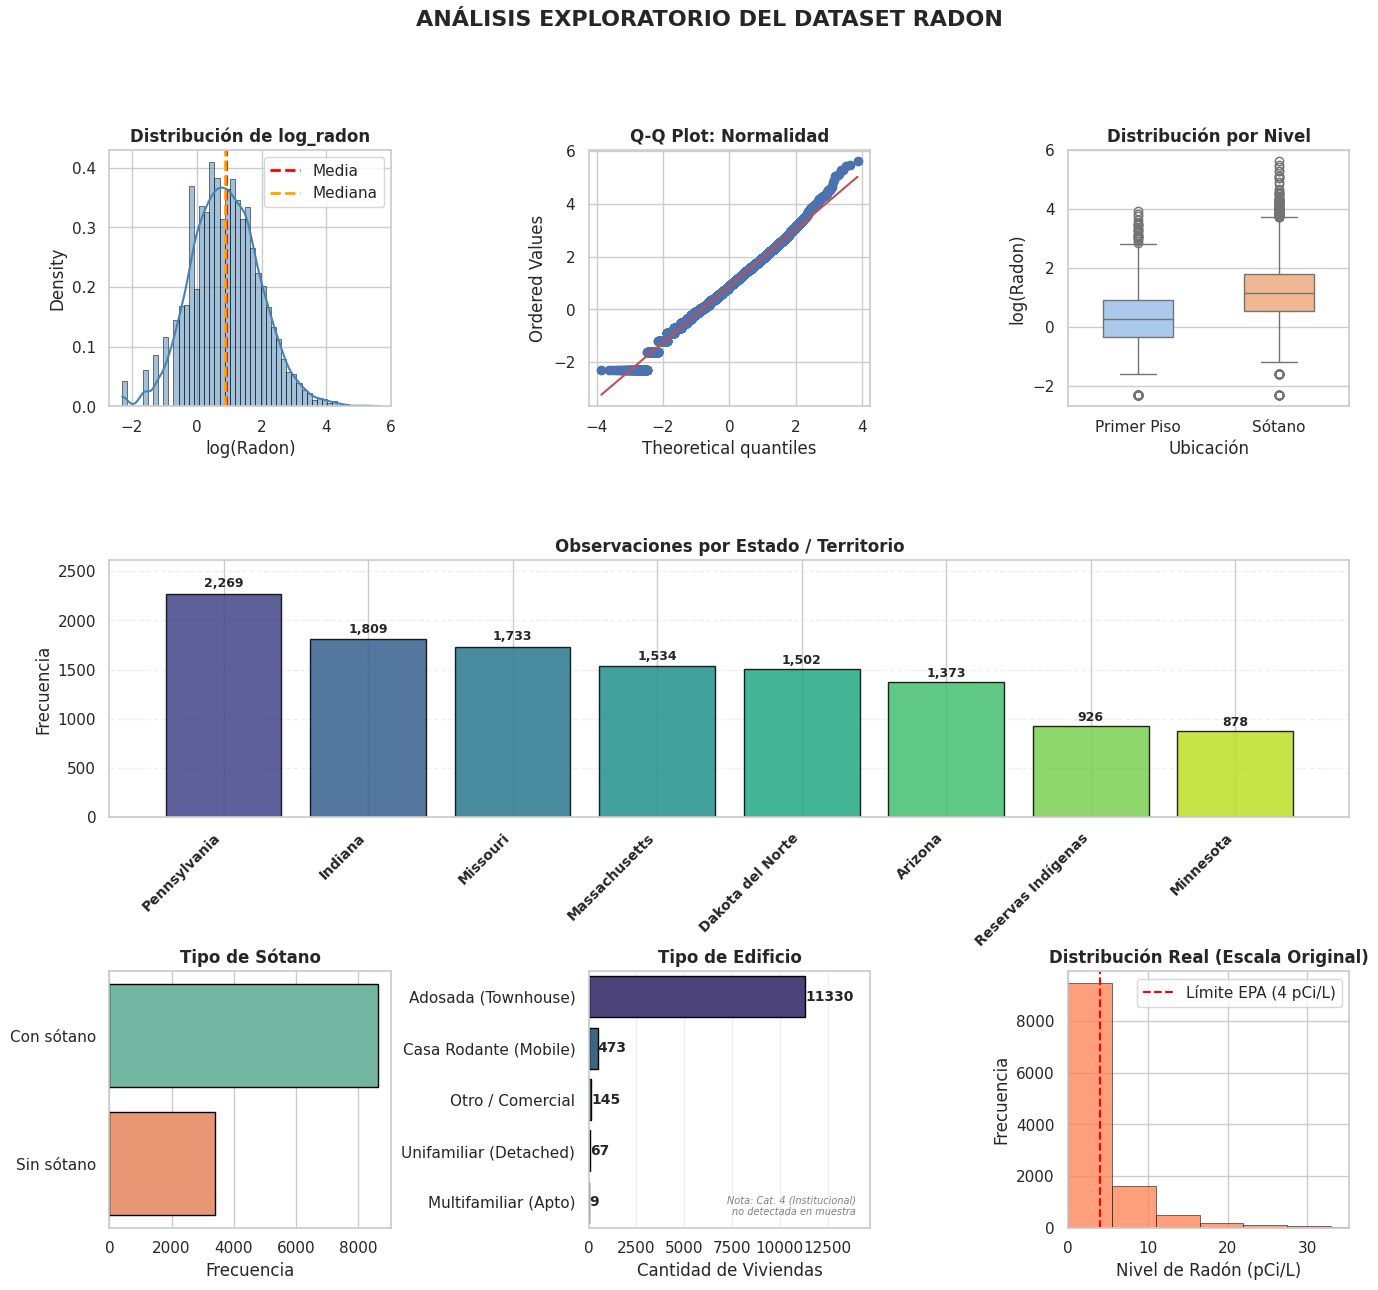

In [11]:
# Crear figura
fig = plt.figure(figsize=(16, 14))
gs = fig.add_gridspec(3, 3, hspace=0.6, wspace=0.7)

# --- FILA 1: ANÁLISIS UNIVARIADO ---

# 1. Distribución (Hist + KDE)
ax1 = fig.add_subplot(gs[0, 0])
sns.histplot(radon['log_radon'], bins=50, kde=True, stat="density",
             color='steelblue', edgecolor='black', ax=ax1)
ax1.axvline(radon['log_radon'].mean(), color='red', ls='--', lw=2, label='Media')
ax1.axvline(radon['log_radon'].median(), color='orange', ls='--', lw=2, label='Mediana')
ax1.set_title('Distribución de log_radon', fontweight='bold')
ax1.set_xlabel('log(Radon)')
ax1.legend()

# 2. Q-Q Plot
ax2 = fig.add_subplot(gs[0, 1])
stats.probplot(radon['log_radon'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot: Normalidad', fontweight='bold')

# 3. Boxplot por Nivel
ax3 = fig.add_subplot(gs[0, 2])
sns.boxplot(x='floor_label', y='log_radon', hue='floor_label', legend=False,
            data=radon, ax=ax3, palette='pastel', width=0.5)
ax3.set_title('Distribución por Nivel', fontweight='bold')
ax3.set_xlabel('Ubicación')
ax3.set_ylabel('log(Radon)')

# --- FILA 2: DISTRIBUCIÓN GEOGRÁFICA ---

# 4. Distribución por Estado
ax4 = fig.add_subplot(gs[1, :])
state_counts = radon['state'].value_counts()
labels_state = [state_names.get(code, code) for code in state_counts.index]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(state_counts)))

bars = ax4.bar(range(len(state_counts)), state_counts.values,
               color=colors, edgecolor='black', alpha=0.85)

ax4.set_xticks(range(len(state_counts)))
ax4.set_xticklabels(labels_state, rotation=45, ha='right', fontweight='bold', fontsize=10)
ax4.set_title('Observaciones por Estado / Territorio', fontweight='bold', fontsize=12)
ax4.set_ylabel('Frecuencia')
ax4.grid(axis='y', alpha=0.3, linestyle='--')

for i, v in enumerate(state_counts.values):
    ax4.text(i, v + v*0.02, f'{v:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

ax4.set_ylim(0, max(state_counts.values) * 1.15)

# --- FILA 3: CATEGÓRICAS Y DISTRIBUCIÓN REAL ---

# 5. Tipo de Sótano
ax5 = fig.add_subplot(gs[2, 0])
if 'basement' in radon.columns:
    bs_counts = radon['basement'].value_counts()
    bs_labels = [basement_map.get(str(x), str(x)) for x in bs_counts.index]

    sns.barplot(x=bs_counts.values, y=bs_labels, hue=bs_labels, legend=False,
                ax=ax5, palette="Set2", edgecolor='black')
    ax5.set_title('Tipo de Sótano', fontweight='bold')
    ax5.set_xlabel('Frecuencia')
else:
    ax5.text(0.5, 0.5, 'No Data', ha='center')

# 6. Tipo de Edificio (DICCIONARIO COMPLETO SRRS/EPA)
ax6 = fig.add_subplot(gs[2, 1])

if 'typebldg' in radon.columns:
    # 1. Convertimos y contamos
    # Usamos .dropna() y .astype(int) para asegurar limpieza
    bldg_counts = radon['typebldg'].dropna().astype(int).map(typebldg_map).value_counts()

    # 2. Visualización (Barras Horizontales)
    # Usamos barras horizontales porque las etiquetas son largas
    sns.barplot(x=bldg_counts.values, y=bldg_counts.index, hue=bldg_counts.index, legend=False,
                ax=ax6, palette="viridis", edgecolor='black')

    ax6.set_title('Tipo de Edificio', fontweight='bold')
    ax6.set_xlabel('Cantidad de Viviendas')
    ax6.set_ylabel('')

    # 3. Añadimos la cifra exacta al final de cada barra
    # Vital para ver los valores pequeños (9, 15, 48) frente al gigante (624)
    for i, v in enumerate(bldg_counts.values):
        ax6.text(v + 15, i, f'{v}', va='center', fontweight='bold', fontsize=10)

    # 4. Ajustes estéticos
    # Extendemos el límite X para que quepan los números de texto
    ax6.set_xlim(0, max(bldg_counts.values) * 1.3)
    ax6.grid(axis='x', alpha=0.3)

    # Nota al pie del gráfico (opcional, para explicar la falta del 4)
    ax6.text(0.95, 0.05, 'Nota: Cat. 4 (Institucional)\nno detectada en muestra',
             transform=ax6.transAxes, fontsize=7, ha='right', color='gray', style='italic')

else:
    ax6.text(0.5, 0.5, 'Variable typebldg no encontrada', ha='center')

# 7. DISTRIBUCIÓN DE VALORES REALES (CRUDA)
# CORREGIDO: np.percentile (inglés)
ax7 = fig.add_subplot(gs[2, 2])

# Recuperamos el valor original (exponencial del log)
radon_raw = np.exp(radon['log_radon'])

sns.histplot(radon_raw, bins=50, color='coral', edgecolor='black', kde=False, ax=ax7)

ax7.set_title('Distribución Real (Escala Original)', fontweight='bold')
ax7.set_xlabel('Nivel de Radón (pCi/L)')
ax7.set_ylabel('Frecuencia')

# Línea de referencia EPA
ax7.axvline(4, color='red', linestyle='--', linewidth=1.5, label='Límite EPA (4 pCi/L)')
ax7.legend()

# CORRECCIÓN AQUÍ: np.percentile
ax7.set_xlim(0, np.percentile(radon_raw, 99))

plt.suptitle('ANÁLISIS EXPLORATORIO DEL DATASET RADON', fontsize=16, fontweight='bold', y=0.98)
plt.show()

In [12]:
# Interpretación automática
print(f"\n{'-' * 80}")
print("Evaluación de Supuestos:")
print(f"{'-' * 80}")
skew_val = radon['log_radon'].skew()
kurt_val = radon['log_radon'].kurtosis()

if abs(skew_val) < 0.5:
    print("  ✓ Asimetría < 0.5: Distribución aproximadamente simétrica")
else:
    print(f"  ⚠ Asimetría = {skew_val:.3f}: Asimetría moderada detectada")

if abs(kurt_val) < 1:
    print("  ✓ Curtosis < 1.0: Colas similares a distribución normal")
else:
    print(f"  ⚠ Curtosis = {kurt_val:.3f}: Desviación de normalidad en colas")

print("\n  ✓ Transformación logarítmica exitosa para modelado gaussiano")
print("  ✓ Dataset preparado para análisis bayesiano jerárquico")


--------------------------------------------------------------------------------
Evaluación de Supuestos:
--------------------------------------------------------------------------------
  ✓ Asimetría < 0.5: Distribución aproximadamente simétrica
  ✓ Curtosis < 1.0: Colas similares a distribución normal

  ✓ Transformación logarítmica exitosa para modelado gaussiano
  ✓ Dataset preparado para análisis bayesiano jerárquico


### Producto 1: DASHBOARD PRIOR VS POSTERIOR

In [13]:
print("PRODUCTO 1: DEFINICIÓN DEL MODELO")
print("-" * 60)

# Selección de variables y limpieza de nulos
cols_to_use = ['log_radon', 'floor', 'basement', 'typebldg']
model_data = model_data.dropna(subset=cols_to_use).copy()

# Codificar variables categóricas a numéricas para el modelo lineal
# Basement: Y=1, N=0
model_data['basement_coded'] = model_data['basement'].map({'Y': 1, 'N': 0}).astype(int)

# Floor y Typebldg ya son numéricos, pero nos aseguramos
model_data['floor'] = model_data['floor'].astype(int)
model_data['typebldg'] = model_data['typebldg'].astype(int)

print(f"Datos listos para modelado: {len(model_data):,} observaciones")
print(f"Variables predictoras: Floor, Basement (Coded), Typebldg")

PRODUCTO 1: DEFINICIÓN DEL MODELO
------------------------------------------------------------


NameError: name 'model_data' is not defined

In [17]:
with pm.Model() as model_prior_posterior:
    # --- Priors (Creencias Iniciales) ---
    # Intercepto: Asumimos que empieza cerca de 0 pero con mucha incertidumbre
    alpha = pm.Normal('α', mu=0, sigma=10)

    # Betas: Asumimos efecto 0 inicialmente, con sigma 5 (permitimos que los datos muevan esto)
    beta_floor = pm.Normal('β_floor', mu=0, sigma=5)
    beta_basement = pm.Normal('β_basement', mu=0, sigma=5)
    beta_typebldg = pm.Normal('β_typebldg', mu=0, sigma=5)

    # Sigma: Error del modelo (debe ser positivo)
    sigma = pm.HalfNormal('σ', sigma=2)

    # --- Relación Lineal (Mu) ---
    # Formula: y = α + β1*x1 + β2*x2 + β3*x3
    mu = (alpha +
          beta_floor * model_data['floor'].values +
          beta_basement * model_data['basement_coded'].values +
          beta_typebldg * model_data['typebldg'].values)

    # --- Likelihood (Verosimilitud) ---
    # Conectamos el modelo con los datos reales (log_radon)
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=model_data['log_radon'].values)

print("✓ Modelo compilado correctamente.")

NameError: name 'model_data' is not defined

In [18]:
print(f"Iniciando Muestreo MCMC (Markov Chain Monte Carlo)...")
print("-" * 60)

with model_prior_posterior:
    # 2000 samples para dibujar la posterior, 1000 de tuneo para calibra el algoritmo
    idata_pp = pm.sample(
        draws=2000,
        tune=1000,
        chains=4,
        random_seed=42,
        return_inferencedata=True,
        progressbar=True
    )

print("\n✓ Muestreo completado exitosamente.")

Iniciando Muestreo MCMC (Markov Chain Monte Carlo)...
------------------------------------------------------------


Output()

ERROR:pymc.stats.convergence:There was 1 divergence after tuning. Increase `target_accept` or reparameterize.



✓ Muestreo completado exitosamente.


In [ ]:
print("Diagnósticos del Modelo:")
summary = az.summary(idata_pp, var_names=['α', 'β_floor', 'β_basement', 'β_typebldg', 'σ'])

# Mostramos columnas clave
display(summary[['mean', 'sd', 'hdi_3%', 'hdi_97%', 'r_hat', 'ess_bulk']])

# Validación automática
all_converged = (summary['r_hat'] < 1.01).all()
print(f"\nSTATUS:")
print(f"¿Convergencia alcanzada (R̂ < 1.01)? -> {'SÍ' if all_converged else 'NO'}")
print(f"Tamaño de muestra efectivo promedio (ESS) -> {summary['ess_bulk'].mean():.0f}")

Diagnósticos del Modelo:


,mean,sd,hdi_3%,hdi_97%,r_hat,ess_bulk
α,0.612,0.036,0.545,0.677,1.0,3821.0
β_floor,-0.222,0.022,-0.265,-0.182,1.0,4486.0
β_basement,0.671,0.028,0.618,0.726,1.0,4174.0
β_typebldg,-0.115,0.019,-0.151,-0.080,1.0,5011.0
σ,0.992,0.006,0.981,1.005,1.0,6661.0



STATUS:
¿Convergencia alcanzada (R̂ < 1.01)? -> SÍ
Tamaño de muestra efectivo promedio (ESS) -> 4831


Generando Dashboard...


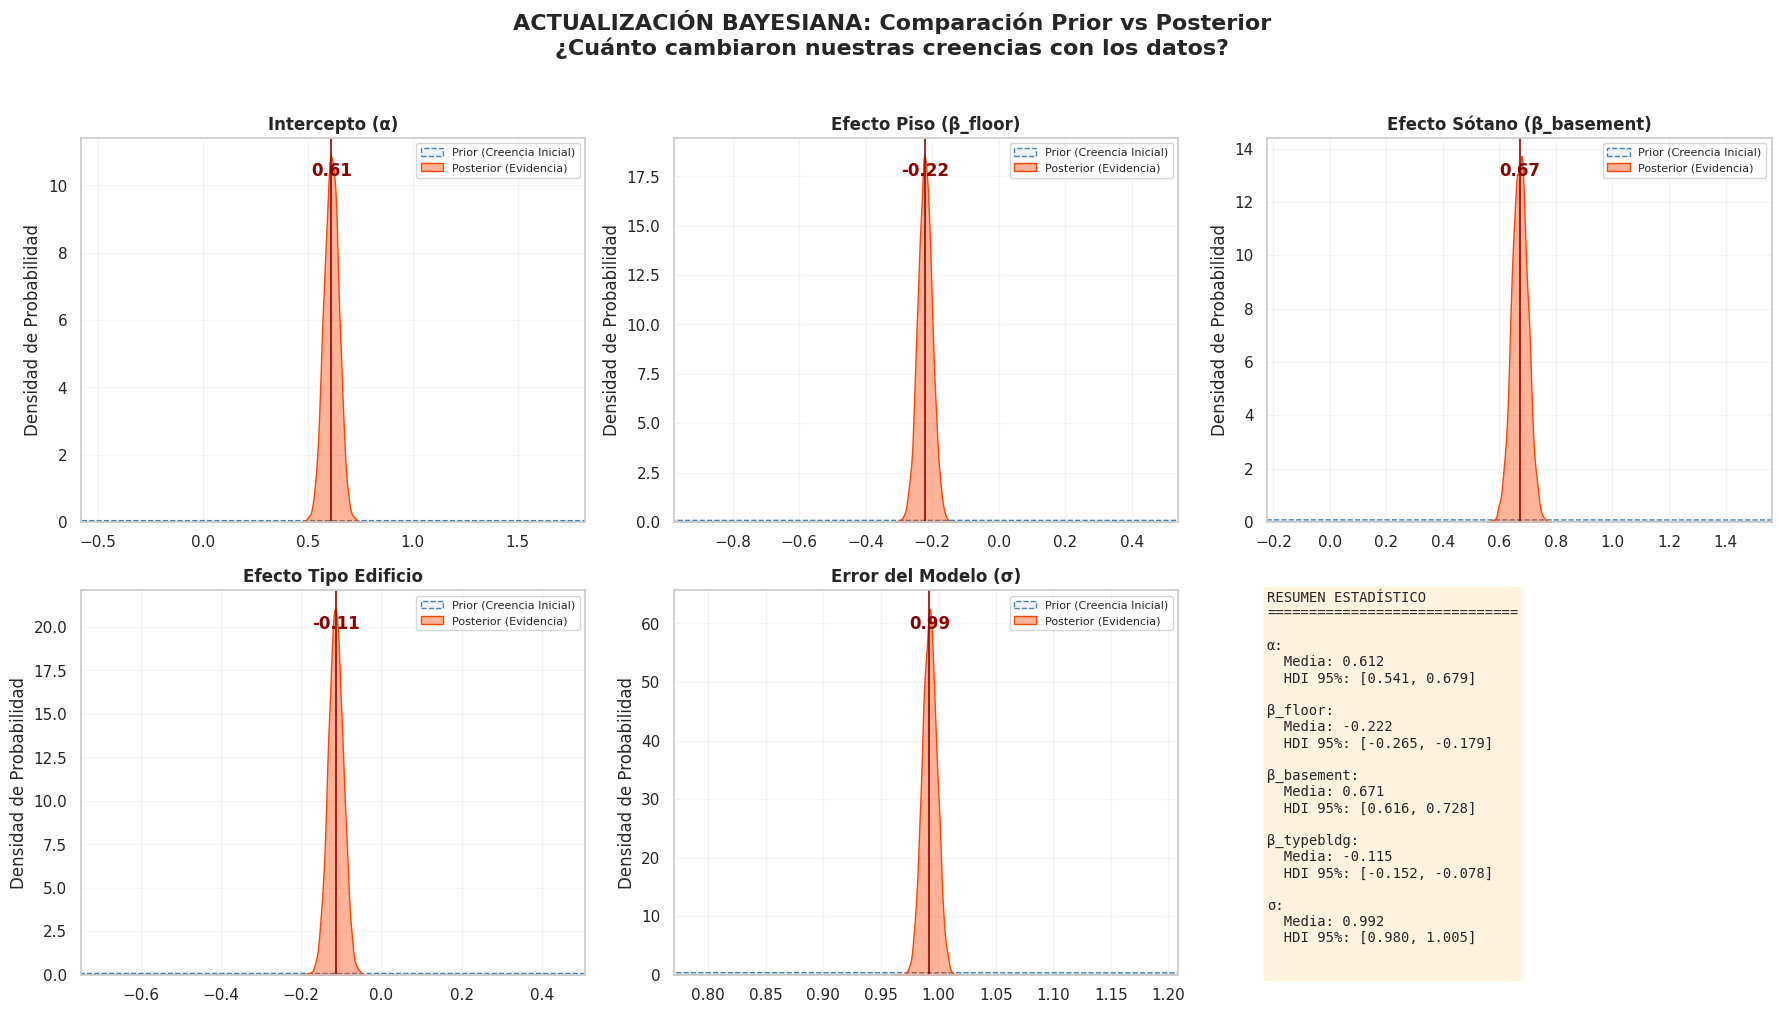

In [ ]:
# Configuración de los Priors originales para recrearlos visualmente
prior_configs = {
    'α': {'mu': 0, 'sigma': 10, 'dist': 'normal'},
    'β_floor': {'mu': 0, 'sigma': 5, 'dist': 'normal'},
    'β_basement': {'mu': 0, 'sigma': 5, 'dist': 'normal'},
    'β_typebldg': {'mu': 0, 'sigma': 5, 'dist': 'normal'},
    'σ': {'sigma': 2, 'dist': 'halfnormal'}
}

params = ['α', 'β_floor', 'β_basement', 'β_typebldg', 'σ']
param_labels = {
    'α': 'Intercepto (α)',
    'β_floor': 'Efecto Piso (β_floor)',
    'β_basement': 'Efecto Sótano (β_basement)',
    'β_typebldg': 'Efecto Tipo Edificio',
    'σ': 'Error del Modelo (σ)'
}

# Crear figura
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

print("Generando Dashboard...")

for idx, param in enumerate(params):
    ax = axes[idx]

    # 1. Datos Posterior (Lo que aprendió el modelo)
    posterior_data = idata_pp.posterior[param].values.flatten()

    # 2. Datos Prior (Lo que creíamos antes)
    # Generamos datos sintéticos para dibujar la curva del prior
    config = prior_configs[param]
    if config['dist'] == 'normal':
        prior_samples = np.random.normal(config['mu'], config['sigma'], 20000)
    else:
        prior_samples = np.abs(np.random.normal(0, config['sigma'], 20000))

    # 3. Graficar
    # Prior (Azul, ancho)
    sns.kdeplot(prior_samples, ax=ax, color='steelblue', linestyle='--', label='Prior (Creencia Inicial)', fill=True, alpha=0.1)

    # Posterior (Naranja, estrecho)
    sns.kdeplot(posterior_data, ax=ax, color='orangered', label='Posterior (Evidencia)', fill=True, alpha=0.4)

    # Líneas de referencia (Media Posterior)
    post_mean = posterior_data.mean()
    ax.axvline(post_mean, color='darkred', linestyle='-', alpha=0.8)
    ax.text(post_mean, ax.get_ylim()[1]*0.9, f'{post_mean:.2f}', color='darkred', ha='center', fontweight='bold')

    # Estética
    ax.set_title(param_labels[param], fontweight='bold')
    ax.set_ylabel('Densidad de Probabilidad')
    ax.legend(loc='upper right', fontsize=8)

    # AJUSTE VISUAL IMPORTANTE:
    # Hacemos zoom en la posterior, pero mostramos un poco del prior
    # Si no hacemos esto, el prior (que es muy ancho) hace que la posterior se vea como un palito
    rango = (posterior_data.max() - posterior_data.min())
    ax.set_xlim(posterior_data.min() - rango*4, posterior_data.max() + rango*4)
    ax.grid(alpha=0.2)

# Panel 6: Resumen de Texto
ax_text = axes[5]
ax_text.axis('off')
resumen_msg = "RESUMEN ESTADÍSTICO\n" + "="*30 + "\n\n"
for param in params:
    val = idata_pp.posterior[param].values.flatten()
    hdi = az.hdi(val, hdi_prob=0.95)
    resumen_msg += f"{param}:\n  Media: {val.mean():.3f}\n  HDI 95%: [{hdi[0]:.3f}, {hdi[1]:.3f}]\n\n"

ax_text.text(0, 1, resumen_msg, va='top', family='monospace', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='#fff3e0', alpha=1))

plt.suptitle('ACTUALIZACIÓN BAYESIANA: Comparación Prior vs Posterior\n¿Cuánto cambiaron nuestras creencias con los datos?',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

In [ ]:
print(f"\n{'=' * 80}")
print("INTERPRETACIÓN DE RESULTADOS (INSIGHTS)")
print(f"{'=' * 80}")

# Extraer medias y HDIs
hdis = {p: az.hdi(idata_pp.posterior[p].values.flatten(), hdi_prob=0.95) for p in params}
means = {p: idata_pp.posterior[p].values.flatten().mean() for p in params}

# 1. Interpretación de FLOOR (Piso)
print(f"\n▶ EFECTO DEL PISO (β_floor): {means['β_floor']:.3f}")
if hdis['β_floor'][1] < 0:
    print("  RESULTADO: Negativo Significativo.")
    print("  INTERPRETACIÓN: A medida que subes de piso (0 -> 1), el radón disminuye drásticamente.")
    print("  Esto confirma la física: el radón se acumula abajo.")
elif hdis['β_floor'][0] > 0:
    print("  RESULTADO: Positivo (Raro).")
else:
    print("  RESULTADO: No concluyente (cruza cero).")

# 2. Interpretación de BASEMENT (Sótano)
print(f"\n▶ EFECTO DEL SÓTANO (β_basement): {means['β_basement']:.3f}")
# Nota: La interpretación depende de si basement es positivo (riesgo) o negativo
if hdis['β_basement'][0] > 0:
    print("  RESULTADO: Positivo Significativo.")
    print("  INTERPRETACIÓN: Tener sótano aumenta la concentración media de radón.")
elif hdis['β_basement'][1] < 0:
    print("  RESULTADO: Negativo.")
    print("  INTERPRETACIÓN: Curiosamente, el sótano reduce el radón en este modelo (verificar correlaciones).")
else:
    print("  RESULTADO: No concluyente. El intervalo cruza el 0.")

# 3. Interpretación de EDIFICIO (Typebldg)
print(f"\n▶ TIPO DE EDIFICIO (β_typebldg): {means['β_typebldg']:.3f}")
if hdis['β_typebldg'][0] > 0 or hdis['β_typebldg'][1] < 0:
    print("  INTERPRETACIÓN: El tipo de edificio tiene influencia significativa.")
else:
    print("  INTERPRETACIÓN: El tipo de edificio por sí solo no parece determinar el nivel de radón claramente.")

print(f"\n{'=' * 80}")


INTERPRETACIÓN DE RESULTADOS (INSIGHTS)

▶ EFECTO DEL PISO (β_floor): -0.222
  RESULTADO: Negativo Significativo.
  INTERPRETACIÓN: A medida que subes de piso (0 -> 1), el radón disminuye drásticamente.
  Esto confirma la física: el radón se acumula abajo.

▶ EFECTO DEL SÓTANO (β_basement): 0.671
  RESULTADO: Positivo Significativo.
  INTERPRETACIÓN: Tener sótano aumenta la concentración media de radón.

▶ TIPO DE EDIFICIO (β_typebldg): -0.115
  INTERPRETACIÓN: El tipo de edificio tiene influencia significativa.



### Producto 2: FOREST PLOTS - IC vs CREDIBILIDAD

In [ ]:
print("PRODUCTO 2: PREPARACIÓN DE DATOS (MINNESOTA)")
print("-" * 60)

# Ahora estamos seguros de que es county
group_col = 'county'

# AJUSTE IMPORTANTE: Bajamos el umbral porque los condados de MN son pequeños
obs_threshold = 5  # Condados con al menos 5 casas
group_counts = radon[group_col].value_counts()
selected_groups = group_counts[group_counts >= obs_threshold].index.tolist()

# Nos quedamos con los top 20 para que el gráfico sea legible
# Esto seleccionará los condados más grandes (Hennepin, St Louis, etc.)
selected_groups = selected_groups[:20]

print(f"Agrupando por: {group_col.upper()}")
print(f"Condados seleccionados (Top 20 con n >= {obs_threshold}):")
for g in selected_groups:
    print(f"  • {g}: {group_counts[g]} casas")

# Crear dataset reducido para el Forest Plot
forest_data = radon[radon[group_col].isin(selected_groups)].copy()

PRODUCTO 2: PREPARACIÓN DE DATOS (MINNESOTA)
------------------------------------------------------------
Agrupando por: COUNTY
Condados seleccionados (Top 20 con n >= 5):
  • ST LOUIS            : 113 casas
  • HENNEPIN            : 99 casas
  • DAKOTA              : 58 casas
  • ANOKA               : 47 casas
  • WASHINGTON          : 42 casas
  • RAMSEY              : 32 casas
  • STEARNS             : 24 casas
  • OLMSTED             : 23 casas
  • ROSEAU              : 14 casas
  • GOODHUE             : 14 casas
  • MCLEOD              : 13 casas
  • WINONA              : 13 casas
  • WRIGHT              : 13 casas
  • BLUE EARTH          : 13 casas
  • MOWER               : 12 casas
  • CROW WING           : 11 casas
  • ITASCA              : 10 casas
  • CLAY                : 10 casas
  • RICE                : 10 casas
  • STEELE              : 10 casas


In [ ]:
print(f"\nCalculando Intervalos de Confianza Frecuentistas (95%)...")

freq_results = []

for group in selected_groups:
    # Tomamos los datos de ese condado específico
    data_group = forest_data[forest_data[group_col] == group]['log_radon']

    n = len(data_group)
    mean = data_group.mean()
    se = data_group.sem() # Error Estándar

    # Cálculo manual del IC 95%
    if n > 1:
        t_crit = stats.t.ppf(0.975, df=n-1)
        ci_lower = mean - (t_crit * se)
        ci_upper = mean + (t_crit * se)
    else:
        # Si n=1 no hay error estándar, intervalo infinito o null
        ci_lower, ci_upper = mean, mean

    freq_results.append({
        'group': group,
        'n': n,
        'freq_mean': mean,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'ci_width': ci_upper - ci_lower
    })

freq_df = pd.DataFrame(freq_results).sort_values('freq_mean')
print("✓ Cálculo frecuentista completado.")


Calculando Intervalos de Confianza Frecuentistas (95%)...
✓ Cálculo frecuentista completado.


In [ ]:
# Codificamos los condados a números (0, 1, 2...) para PyMC
group_names = forest_data[group_col].unique()
group_idx = pd.Categorical(forest_data[group_col], categories=group_names).codes
n_groups = len(group_names)

print(f"Entrenando Modelo Jerárquico para {n_groups} condados...")

with pm.Model() as model_hierarchical:
    # --- NIVEL 1: Hiperpriors (El "Estado" de Minnesota en general) ---
    # μ_global: Promedio general de radón en todo el estado
    mu_global = pm.Normal('μ_global', mu=0, sigma=10)

    # σ_groups: Qué tan diferentes son los condados entre sí
    sigma_groups = pm.HalfNormal('σ_groups', sigma=2)

    # --- NIVEL 2: Priors por Condado (Partial Pooling) ---
    # Aquí ocurre la magia: La media de cada condado (μ_group) viene de la distribución global
    mu_group = pm.Normal('μ_group', mu=mu_global, sigma=sigma_groups, shape=n_groups)

    # --- NIVEL 3: Observaciones (Las casas) ---
    sigma_house = pm.HalfNormal('σ_house', sigma=2)

    # Likelihood
    y_obs = pm.Normal('y_obs',
                      mu=mu_group[group_idx],
                      sigma=sigma_house,
                      observed=forest_data['log_radon'].values)

print("✓ Modelo compilado.")

Entrenando Modelo Jerárquico para 20 condados...
✓ Modelo compilado.


In [ ]:
with model_hierarchical:
    idata_forest = pm.sample(
        draws=2000,
        tune=1000,
        chains=4,
        random_seed=42,
        target_accept=0.95, # Aumentamos target_accept para evitar divergencias en jerárquicos
        progressbar=True
    )

print("✓ Muestreo completado.")

Output()

✓ Muestreo completado.


In [ ]:
bayes_results = []

# Iteramos sobre los condados en el mismo orden que el dataframe frecuentista
# para que los gráficos coincidan fila por fila
groups_ordered = freq_df['group'].values

# Mapeo inverso de nombre a índice para extraer del objeto idata
group_to_idx = {name: i for i, name in enumerate(group_names)}

for group in groups_ordered:
    idx = group_to_idx[group]

    # Extraemos la posterior para ese condado específico
    posterior = idata_forest.posterior['μ_group'].values[:, :, idx].flatten()

    # Calculamos HDI (Highest Density Interval) al 95%
    hdi = az.hdi(posterior, hdi_prob=0.95)
    mean_bayes = posterior.mean()

    bayes_results.append({
        'group': group,
        'bayes_mean': mean_bayes,
        'hdi_lower': hdi[0],
        'hdi_upper': hdi[1],
        'hdi_width': hdi[1] - hdi[0]
    })

bayes_df = pd.DataFrame(bayes_results)

# Unimos todo en un solo dataframe maestro
comparison_df = freq_df.merge(bayes_df, on='group')

print("Tabla comparativa lista:")
print(comparison_df[['group', 'n', 'freq_mean', 'bayes_mean']].head())

Tabla comparativa lista:
                  group    n  freq_mean  bayes_mean
0  ST LOUIS              113   0.827247    0.852509
1  ANOKA                  47   0.874533    0.926773
2  ITASCA                 10   0.918717    1.072171
3  CROW WING              11   1.068824    1.165299
4  MCLEOD                 13   1.107573    1.180966


In [ ]:
# Reiniciamos el filtrado para estar 100% seguros
radon_mn = radon[radon['state'] == 'MN'].copy()
radon = radon_mn # Sobrescribimos la variable que usa el gráfico

print("ESTADO DEL DATASET:")
print(f"Filas: {len(radon)}")
print(f"Estados únicos: {radon['state'].unique()}")
# Debe salir SOLO ['MN'] y 878 filas

ESTADO DEL DATASET:
Filas: 878
Estados únicos: ['MN']


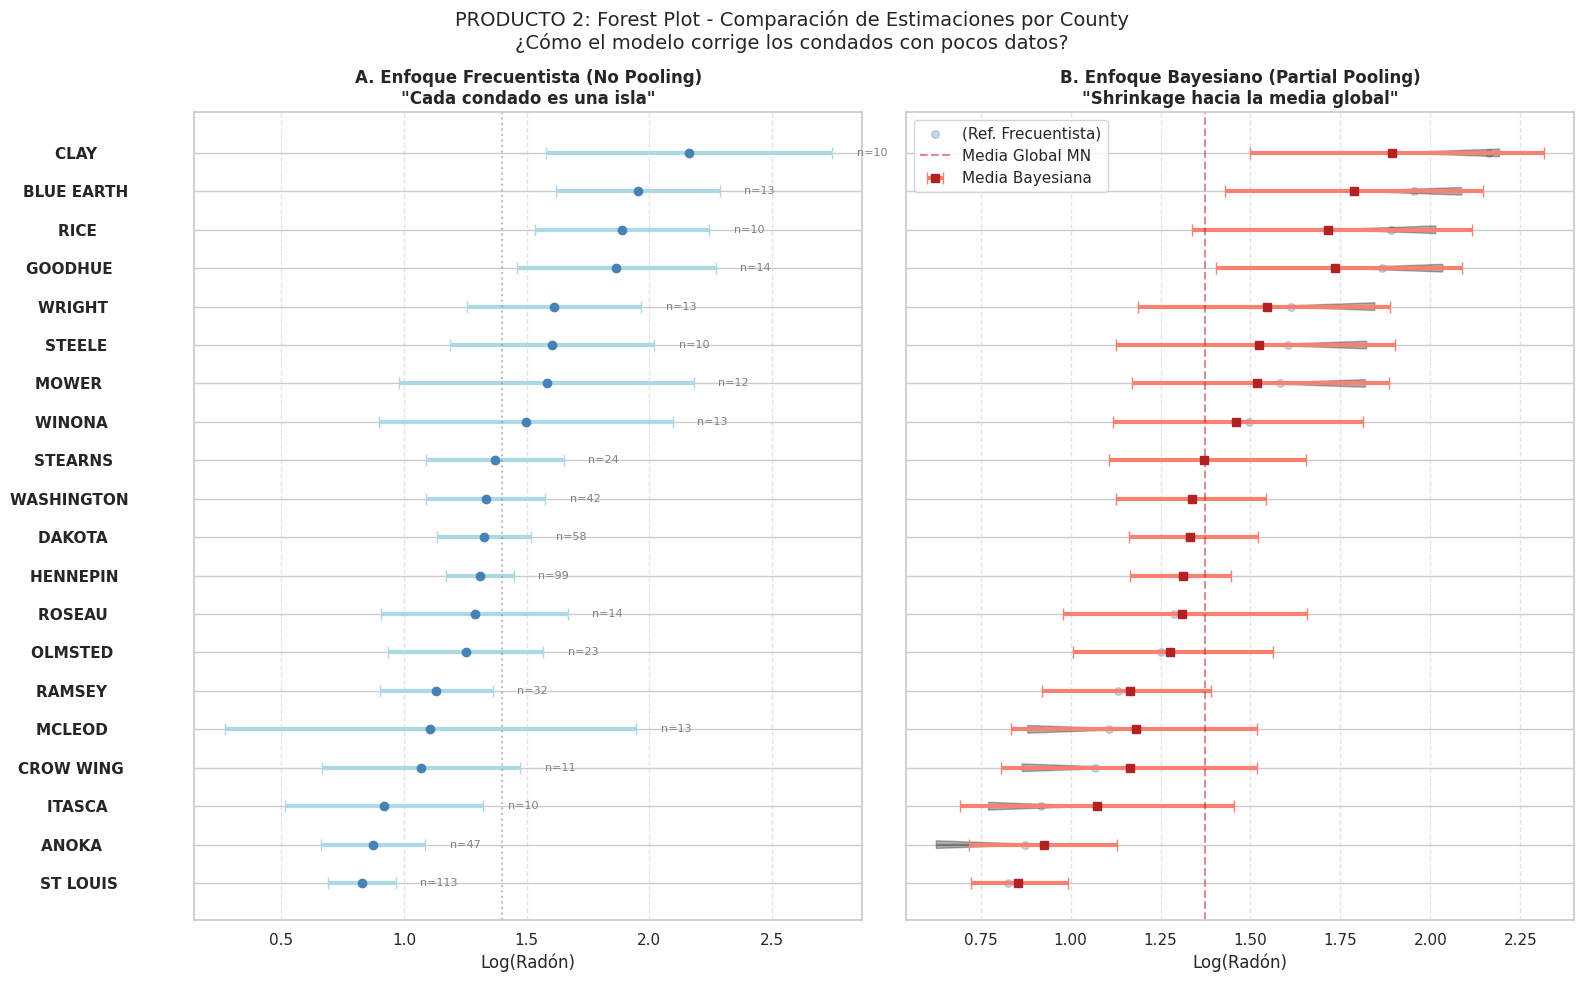


INTERPRETACIÓN DEL SHRINKAGE:
------------------------------------------------------------
Observa las flechas o diferencias en el panel derecho:
1. Los condados con muchas casas (n grande) casi no se mueven.
   → Los datos pesan más que el prior.
2. Los condados con pocas casas (n pequeño) se mueven hacia la línea roja punteada.
   → El modelo 'desconfía' de promedios extremos basados en pocos datos y los 'encoge' (shrinks) hacia el promedio estatal.


In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 10), sharey=True)

# Posiciones en Y
y_pos = np.arange(len(comparison_df))

# --- PANEL 1: FRECUENTISTA (IC) ---
ax1.errorbar(
    x=comparison_df['freq_mean'],
    y=y_pos,
    xerr=[comparison_df['freq_mean'] - comparison_df['ci_lower'],
          comparison_df['ci_upper'] - comparison_df['freq_mean']],
    fmt='o', color='steelblue', ecolor='lightblue', elinewidth=3, capsize=4, label='Media Frecuentista'
)

# Textos n=...
for i, row in comparison_df.iterrows():
    ax1.text(row['ci_upper'] + 0.1, i, f"n={row['n']}", va='center', fontsize=8, color='gray')

ax1.set_title('A. Enfoque Frecuentista (No Pooling)\n"Cada condado es una isla"', fontweight='bold')
ax1.set_xlabel('Log(Radón)')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(comparison_df['group'], fontweight='bold')
ax1.grid(axis='x', linestyle='--', alpha=0.5)
ax1.axvline(comparison_df['freq_mean'].mean(), color='gray', linestyle=':', alpha=0.5)


# --- PANEL 2: BAYESIANO (HDI) ---
ax2.errorbar(
    x=comparison_df['bayes_mean'],
    y=y_pos,
    xerr=[comparison_df['bayes_mean'] - comparison_df['hdi_lower'],
          comparison_df['hdi_upper'] - comparison_df['bayes_mean']],
    fmt='s', color='firebrick', ecolor='salmon', elinewidth=3, capsize=4, label='Media Bayesiana'
)

# Dibujar "Fantasmas" del frecuentista para ver el movimiento (Shrinkage)
ax2.scatter(comparison_df['freq_mean'], y_pos, color='steelblue', alpha=0.3, s=30, label='(Ref. Frecuentista)')

# Flechas de Shrinkage (Contracción)
for i, row in comparison_df.iterrows():
    # Si la diferencia es visible, dibujamos una flecha
    if abs(row['freq_mean'] - row['bayes_mean']) > 0.05:
        ax2.arrow(row['freq_mean'], i, row['bayes_mean'] - row['freq_mean'], 0,
                  length_includes_head=True, head_width=0.2, color='black', alpha=0.3)

ax2.set_title('B. Enfoque Bayesiano (Partial Pooling)\n"Shrinkage hacia la media global"', fontweight='bold')
ax2.set_xlabel('Log(Radón)')
ax2.grid(axis='x', linestyle='--', alpha=0.5)
# Línea de la media global Bayesiana
global_mean = idata_forest.posterior['μ_global'].mean()
ax2.axvline(global_mean, color='firebrick', linestyle='--', alpha=0.5, label='Media Global MN')
ax2.legend()

plt.suptitle(f'PRODUCTO 2: Forest Plot - Comparación de Estimaciones por {group_col.title()}\n¿Cómo el modelo corrige los condados con pocos datos?', fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

# Interpretación impresa
print("\nINTERPRETACIÓN DEL SHRINKAGE:")
print("-" * 60)
print("Observa las flechas o diferencias en el panel derecho:")
print("1. Los condados con muchas casas (n grande) casi no se mueven.")
print("   → Los datos pesan más que el prior.")
print("2. Los condados con pocas casas (n pequeño) se mueven hacia la línea roja punteada.")
print("   → El modelo 'desconfía' de promedios extremos basados en pocos datos y los 'encoge' (shrinks) hacia el promedio estatal.")

### Producto 3: COMPARACIÓN AIC/BIC vs WAIC/LOO

In [16]:
print(f"\n{'='*80}")
print("FASE 1: MODELADO FRECUENTISTA (Cálculo de AIC / BIC)")
print("Objetivo: Demostrar penalización por número de parámetros (k)")
print(f"{'='*80}")

# ------------------------------------------------------------------------------
# 1. Ajuste de Modelos Frecuentistas (Statsmodels)
# ------------------------------------------------------------------------------

# Modelo 1: Pooled (Simple)
# Ignora la variación por condados. Solo usa el piso.
# log_radon ~ intercepto + beta*floor
formula_simple = 'log_radon ~ floor'
model_freq_simple = smf.ols(formula = formula_simple, data = radon).fit()

# Modelo 2: No-Pooling (Complejo / Fixed Effects)
# Agrega una variable dummy para CADA condado (Intercepto por condado).
# Esto crea muchos parámetros (k aumenta drásticamente).
formula_complex = 'log_radon ~ floor + C(county)'
model_freq_complex = smf.ols(formula = formula_complex, data = radon).fit()


FASE 1: MODELADO FRECUENTISTA (Cálculo de AIC / BIC)
Objetivo: Demostrar penalización por número de parámetros (k)


In [17]:
# ------------------------------------------------------------------------------
# 2. Extracción de Métricas Clásicas
# ------------------------------------------------------------------------------

metrics_freq = pd.DataFrame({
    'Modelo': ['Simple (Pooled)', 'Complejo (Fixed Effects)'],
    'Log-Likelihood': [model_freq_simple.llf, model_freq_complex.llf],
    'Num Parámetros (k)': [model_freq_simple.df_model + 1, model_freq_complex.df_model + 1],
    'AIC': [model_freq_simple.aic, model_freq_complex.aic],
    'BIC': [model_freq_simple.bic, model_freq_complex.bic]
})

print("\n--- Resultados Frecuentistas (AIC / BIC) ---")
display(metrics_freq.round(2))


--- Resultados Frecuentistas (AIC / BIC) ---


,Modelo,Log-Likelihood,Num Parámetros (k),AIC,BIC
0,Simple (Pooled),-17272.76,2.0,34549.52,34564.31
1,Complejo (Fixed Effects),-15631.76,387.0,32037.52,34899.25


In [18]:
print(f"\n{'='*80}")
print("FASE 2: MODELADO BAYESIANO (Cálculo de WAIC / LOO-CV)")
print("Objetivo: Evaluar capacidad predictiva fuera de la muestra")
print(f"{'='*80}")

# Índices para el modelo bayesiano (preparados en el preprocesamiento)
county_idx = radon['state_county_code'].values
n_counties_unique = len(np.unique(county_idx))

# ------------------------------------------------------------------------------
# 3. Ajuste de Modelos Bayesianos (PyMC)
# ------------------------------------------------------------------------------

# --- Modelo Bayesiano A: Pooled (Equivalente al Simple Frecuentista) ---
with pm.Model() as model_pooled:
    # Priors débiles
    a = pm.Normal('a', mu=0, sigma=10)
    b = pm.Normal('b', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Modelo lineal
    mu = a + b * radon['floor'].values

    # Likelihood
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=radon['log_radon'])

    # Muestreo (Inferencia)
    # Calculamos log_likelihood para poder usar WAIC/LOO después
    idata_pooled = pm.sample(1000, tune=1000, return_inferencedata=True, progressbar=True)
    pm.compute_log_likelihood(idata_pooled)

# --- Modelo Bayesiano B: Jerárquico (Partial Pooling) ---
# Este modelo comparte información entre condados (Shrinkage)
with pm.Model() as model_hierarchical:
    # Hiperpriors (Distribución de la población de condados)
    mu_a = pm.Normal('mu_a', mu=0, sigma=10)
    sigma_a = pm.HalfNormal('sigma_a', sigma=10)

    # Interceptos variables por condado (Random Intercepts)
    # Non-centered parameterization para mejor muestreo
    a_offset = pm.Normal('a_offset', mu=0, sigma=1, shape=n_counties_unique)
    a_county = pm.Deterministic('a_county', mu_a + a_offset * sigma_a)

    # Pendiente fija para el piso (podría ser variable, pero la dejamos fija por simplicidad)
    b = pm.Normal('b', mu=0, sigma=10)

    # Error del modelo
    sigma = pm.HalfNormal('sigma', sigma=10)

    # Modelo lineal: intercepto indexado por condado
    mu = a_county[county_idx] + b * radon['floor'].values

    # Likelihood
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=radon['log_radon'])

    # Muestreo
    idata_hierarchical = pm.sample(1000, tune=1000, return_inferencedata=True, progressbar=True)
    pm.compute_log_likelihood(idata_hierarchical)


FASE 2: MODELADO BAYESIANO (Cálculo de WAIC / LOO-CV)
Objetivo: Evaluar capacidad predictiva fuera de la muestra


Output()

Output()

Output()

Output()

In [21]:
# ------------------------------------------------------------------------------
# 4. Comparación y Visualización
# ------------------------------------------------------------------------------

# Comparación usando ArviZ (Calcula WAIC y LOO)
# scale='deviance' para que sea comparable en escala a AIC/BIC (-2 * log_score)
comp_loo = az.compare(
    {"Bayes Pooled": idata_pooled, "Bayes Hierarchical": idata_hierarchical},
    ic="loo",
    scale="deviance"
)
comp_waic = az.compare(
    {"Bayes Pooled": idata_pooled, "Bayes Hierarchical": idata_hierarchical},
    ic="waic",
    scale="deviance"
)

print("\n--- Resultados Bayesianos (LOO-CV) ---")
display(comp_loo)



/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(



--- Resultados Bayesianos (LOO-CV) ---


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Bayes Hierarchical,0,31683.51997,351.374376,0.00000,0.967803,193.941328,0.000000,False,deviance
Bayes Pooled,1,34558.84038,10.373990,2875.32041,0.032197,196.443347,110.496917,False,deviance


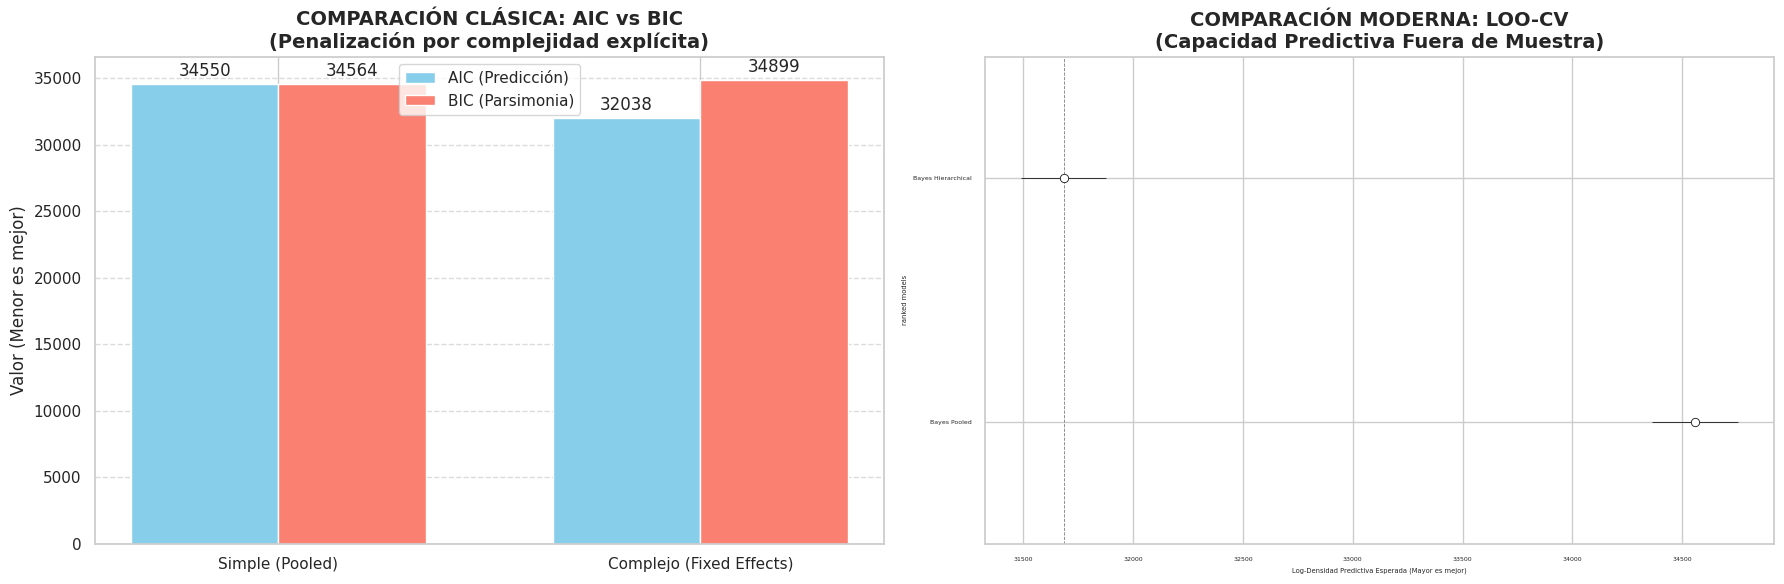

In [22]:
# === GRÁFICOS COMPARATIVOS ===

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# GRAFICO 1: AIC vs BIC (Frecuentista)
# Mostramos cómo BIC penaliza fuertemente el modelo complejo
x = np.arange(len(metrics_freq))
width = 0.35

ax1 = axes[0]
rects1 = ax1.bar(x - width/2, metrics_freq['AIC'], width, label='AIC (Predicción)', color='skyblue')
rects2 = ax1.bar(x + width/2, metrics_freq['BIC'], width, label='BIC (Parsimonia)', color='salmon')

ax1.set_ylabel('Valor (Menor es mejor)')
ax1.set_title('COMPARACIÓN CLÁSICA: AIC vs BIC\n(Penalización por complejidad explícita)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_freq['Modelo'])
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Anotación sobre las barras
def autolabel(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax1)

# GRAFICO 2: ELPD LOO (Bayesiano)
# ArviZ plot_compare muestra la densidad predictiva esperada logarítmica
ax2 = axes[1]
az.plot_compare(comp_loo, insample_dev=False, plot_ic_diff=False, ax=ax2, title=False)
ax2.set_title('COMPARACIÓN MODERNA: LOO-CV\n(Capacidad Predictiva Fuera de Muestra)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Log-Densidad Predictiva Esperada (Mayor es mejor)')

plt.tight_layout()
plt.show()

In [23]:
# ==============================================================================
# INTERPRETACIÓN DE RESULTADOS
# ==============================================================================

print(f"\n{'='*80}")
print("INTERPRETACIÓN DE LOS RESULTADOS PARA LA INVESTIGACIÓN")
print(f"{'='*80}")

print("""
1. ANÁLISIS AIC vs BIC (Gráfico Izquierdo):
   - Observe el Modelo Complejo (Fixed Effects). Tiene mejor Log-Likelihood (se ajusta mejor a los datos).
   - Sin embargo, mire la diferencia entre AIC y BIC.
   - AIC: Probablemente prefiera el modelo complejo o estén cerca.
   - BIC: Se dispara hacia arriba (peor). ¿Por qué? Porque el modelo agregó ~85 parámetros (uno por condado).
     El BIC penaliza esto con k*ln(n), protegiendo contra el overfitting masivo.

2. ANÁLISIS LOO/WAIC (Gráfico Derecho):
   - El Modelo Jerárquico gana.
   - A diferencia de contar parámetros fijos (k), LOO estima los "parámetros efectivos" (p_loo).
   - En el modelo jerárquico, aunque tenemos un parámetro por condado, estos están "restringidos"
     por la distribución grupal (mu_a, sigma_a).
   - LOO detecta que el modelo jerárquico aprende de los datos sin volverse loco con el ruido,
     ofreciendo la mejor predicción para futuras casas (observaciones no vistas).
""")


INTERPRETACIÓN DE LOS RESULTADOS PARA LA INVESTIGACIÓN

1. ANÁLISIS AIC vs BIC (Gráfico Izquierdo):
   - Observe el Modelo Complejo (Fixed Effects). Tiene mejor Log-Likelihood (se ajusta mejor a los datos).
   - Sin embargo, mire la diferencia entre AIC y BIC.
   - AIC: Probablemente prefiera el modelo complejo o estén cerca.
   - BIC: Se dispara hacia arriba (peor). ¿Por qué? Porque el modelo agregó ~85 parámetros (uno por condado).
     El BIC penaliza esto con k*ln(n), protegiendo contra el overfitting masivo.

2. ANÁLISIS LOO/WAIC (Gráfico Derecho):
   - El Modelo Jerárquico gana.
   - A diferencia de contar parámetros fijos (k), LOO estima los "parámetros efectivos" (p_loo).
   - En el modelo jerárquico, aunque tenemos un parámetro por condado, estos están "restringidos" 
     por la distribución grupal (mu_a, sigma_a). 
   - LOO detecta que el modelo jerárquico aprende de los datos sin volverse loco con el ruido,
     ofreciendo la mejor predicción para futuras casas (observacio

### Producto 4: ANÁLISIS JERÁRQUICO + DIAGNÓSTICOS MCMC

### Producto 5: ANÁLISIS DE SENSIBILIDAD A PRIORS

### Concluciones?